<b> 
    <font size="7">
        Computational Finance and FinTech <br><br>
        M.Sc. International Finance
    </font>
</b>
<br><br>
<img src="pics/HWR.png" width=400px>
<br><br>
<b>
    <font size="5"> 
        Prof. Dr. Natalie Packham <br>
        Berlin School of Economics and Law <br>
        Summer Term 2024
    </font>
</b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-in-Finance" data-toc-modified-id="Machine-Learning-in-Finance-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Machine Learning in Finance</a></span><ul class="toc-item"><li><span><a href="#Unsupervised-learning" data-toc-modified-id="Unsupervised-learning-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Unsupervised learning</a></span></li><li><span><a href="#$k$-means-clustering" data-toc-modified-id="$k$-means-clustering-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>$k$-means clustering</a></span></li><li><span><a href="#Supervised-learning" data-toc-modified-id="Supervised-learning-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Supervised learning</a></span></li><li><span><a href="#Gaussian-Naive-Bayes-(GNB)" data-toc-modified-id="Gaussian-Naive-Bayes-(GNB)-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Gaussian Naive Bayes (GNB)</a></span></li><li><span><a href="#Logistic-regression-(LR)" data-toc-modified-id="Logistic-regression-(LR)-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Logistic regression (LR)</a></span></li><li><span><a href="#Decision-trees" data-toc-modified-id="Decision-trees-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Decision trees</a></span></li><li><span><a href="#Deep-neural-networks-(DNN's)" data-toc-modified-id="Deep-neural-networks-(DNN's)-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>Deep neural networks (DNN's)</a></span></li><li><span><a href="#Support-vector-machines-(SVM's)" data-toc-modified-id="Support-vector-machines-(SVM's)-10.8"><span class="toc-item-num">10.8&nbsp;&nbsp;</span>Support vector machines (SVM's)</a></span></li></ul></li></ul></div>

# Machine Learning in Finance

### Machine Learning
* Further reading: __Py4Fi, Chapter 13__, from page 444.
* The __Py4Fi__ book is very brief and application oriented, a great resource to dive deeper is the book
> James, Witten, Hastie, Tibshirani: An Introduction to Statistical Learning. Springer, 2013

### Machine Learning
* Machine Learning is a vast field with diverse applications. 
* This chapter gives an overview and some use cases, which can be used as a starting point.
* Machine Learning methods are split into:
   * unsupervised learning, and
   * supervised learning.
* Machine Learning problems are split into: 
   * regression, and
   * classification.
* Python offers a number of libraries for Machine Learning:
   * `scikit-learn` <http://scikit-learn.org>
   * `TensorFlow` <http://tensorflow.org>

### Machine Learning
* The usual initialisation:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1000)

## Unsupervised learning

### Unsupervised learning
* The principal idea of unsupervised learning is to extract information from data without any guidance or feedback.
* A typical appication is **clustering** (a classification problem).
* One such algorithm is $k$-means clustering, which cluster data into $k$ subsets, called clusters.

## $k$-means clustering

### $k$-means clustering
* `scikit-learn` allows the creation of sample data sets for different types of ML problems. 
* Here we create a sample data set to illustrate $k$-means clustering.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25) # create a sample data set with 250 samples and 4 clusters

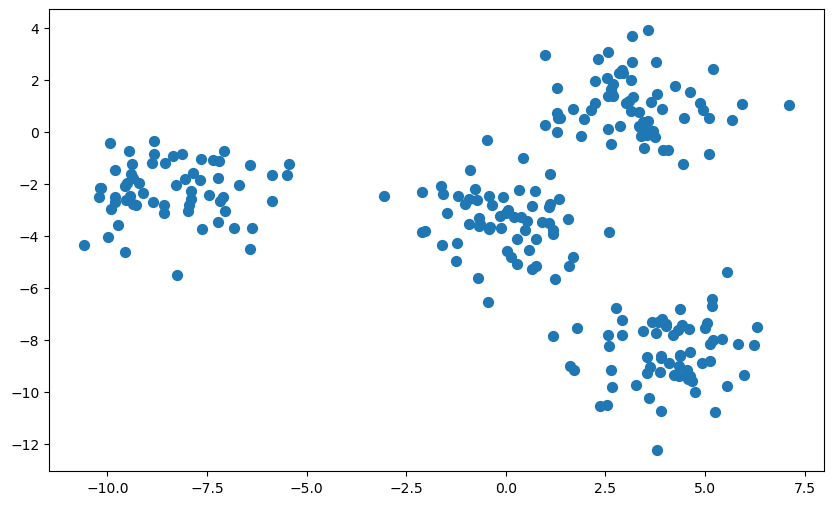

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], s=50);

### $k$-means clustering
* The following code demonstrates the use of $k$-means clustering. 
* The algorithm determines $k$ clusters and assigns each sample to a cluster.

In [5]:
from sklearn.cluster import KMeans # import model class

In [6]:
model = KMeans(n_clusters=4, random_state=0) # instantiate the model
model.fit(X) # fit the model

/Users/nat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [7]:
# predict the cluster (number) for each sample in the raw data
y_kmeans=model.predict(X)
y_kmeans[:12] # some cluster (numbers)

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int32)

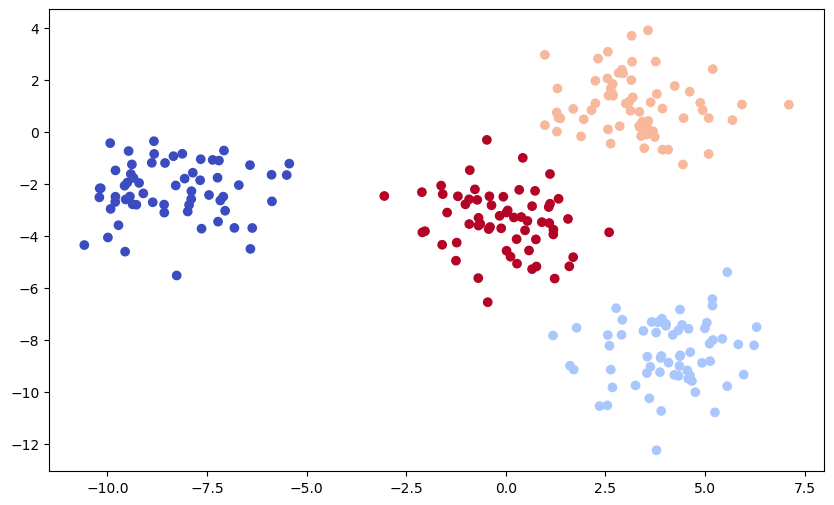

In [8]:
# plot the data with one colour per cluster
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='coolwarm');

### $k$-means clustering
* Here is how it works (see Section 10.3 of James et al., 2013):
* Let $x_1, x_2, \ldots, x_n$ denote the sample of points. 
* Let $C_1, \ldots, C_k$ denote sets containing the indices of the observations in each cluster.
* They must satisfy the following two properties: 
* Each observation belongs to at least one cluster: $C_1\cup C_2\cup\cdots \cup C_k=\{1, \ldots, n\}$. 
* Each observation belongs to no more than one cluster: $C_i\cap C_j$ for all $i,j\in \{1,\ldots, k\}$. 
* The goal is to find $k$ cluster that minimise *within-cluster-variation*.
* This is achieved by minimising least-square-distances (see James et al. for details).

## Supervised learning

### Supervised learning
* Most problems belong to the domain of supervised learning. 
* Here, some guidance in the form of know results or observed data is available. 
* Linear regression is one example of supervised learning.
* Here, we will continues to study classification problems: 
   * Gaussian Naive Bayes
   * Logistic regression
   * Decision trees
   * Deep neural networks
   * Support vector machines

### Supervised learning
* More formally, the setting is as follows: 
* We have *training observations* $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$.
* (Note that $x_k$ can be vectors, i.e., $x_k \in \mathbb R^d$, $d\geq 1$.)
* Given some learning method, we estimate $\hat f$, such that the *predictions* $\hat f(x_1), \hat f(x_2), \ldots, \hat f(x_n)$ are approximately $y_1, y_2, \ldots, y_n$. 
* In practice, we are not so much interested in whether $\hat f(x_i)\approx y_i$. 
* Instead, we want to know whether $\hat f(x_0)$ is approximately equal to $y_0$, where $(x_0,y_0)$ is a previously unseen *test* observation not used in the training stage.

### Supervised learning - classification
* In a classification setting, the $y_1, y_2, \ldots, y_n$ can be qualitative data (corresponding to the classes). 
* The accuracy of the estimate $\hat f(x_i) = \hat y_i$ is quantified for example by the training *error rate*, which is the proportion of incorrectly classified points: 
$\displaystyle\frac{1}{n} \sum_{i=1}^n \mathbf 1_{\{y_i\not=\hat y_i\}}$
* Alternatively, one can specify the proportion of *correctly* classified observations in the training data set: $\displaystyle \frac{1}{n} \sum_{i=1}^n \mathbf 1_{\{y_i=\hat y_i\}}$. 

### The data
* The following code produces a sample set with two features and a single binary label (0 or 1). 

In [9]:
from sklearn.datasets import make_classification
n_samples=100
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, \
                           n_redundant=0, n_repeated=0, random_state=250)
X[:5] # two real-valued features

array([[ 1.68762365, -0.79757726],
       [-0.4312405 , -0.76063089],
       [-1.43934486, -1.23632519],
       [ 1.11799425, -1.86821958],
       [ 0.05020412,  0.65899067]])

In [10]:
X.shape

(100, 2)

In [11]:
y[:5] # single binary label

array([1, 0, 0, 1, 1])

In [12]:
y.shape

(100,)

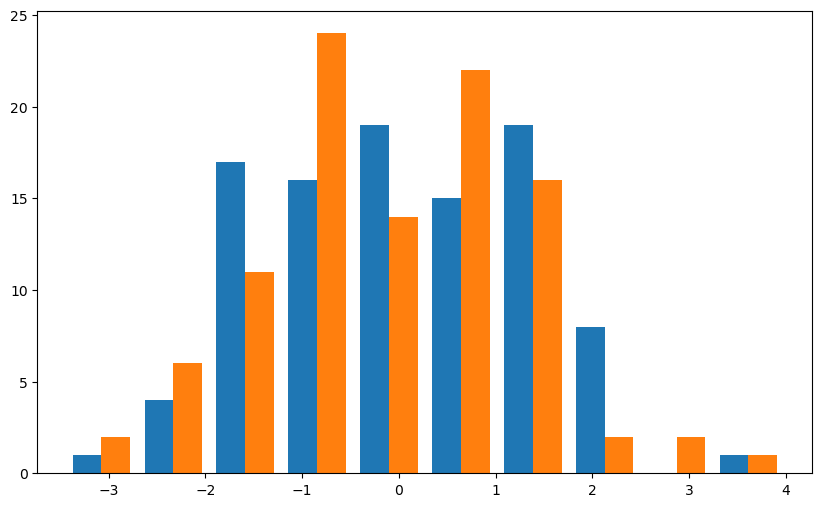

In [13]:
plt.figure(figsize=(10,6))
plt.hist(X);

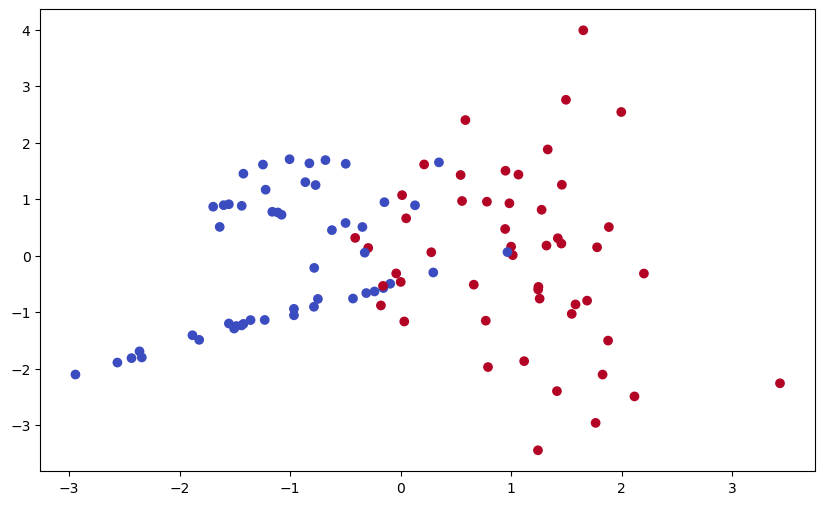

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='coolwarm');

## Gaussian Naive Bayes (GNB)

### Bayes classifier
* The Bayes classifier estimates conditional probabilities $\mathbb P(Y=j|X=x_0)$ for all classes $j=1,\ldots, k$. 
* An observation is assigned its most likely class, i.e., it is assigned to the class for which the conditional probability is greatest. 
* When the observation data is continuous, Gaussian naive Bayes is applied by calculating the conditional probability via a normal density, where the mean and variance are specific to each cluster. 

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [16]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [17]:
model.predict_proba(X).round(4)[:5]

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [18]:
pred = model.predict(X)

In [19]:
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
pred==y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [21]:
accuracy_score(y, pred)

0.87

In [22]:
Xc = X[y==pred]
Xf = X[y!=pred]

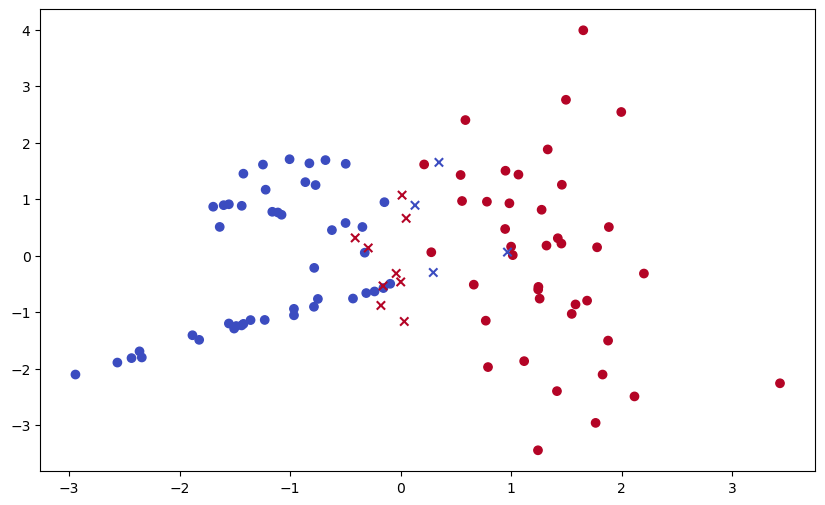

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x=Xc[:,0], y=Xc[:,1], c=y[y==pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:,0], y=Xf[:,1], c=y[y!=pred], marker='x', cmap='coolwarm');

## Logistic regression (LR)
* Logistic regression is a regression method where the dependent variable is a categorical variable (as opposed to a continuous variable). 
* It models the probability of the categorical variable given the independent variables. 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression(C=1, solver='lbfgs')
model.fit(X,y)

LogisticRegression(C=1)

In [26]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [27]:
pred = model.predict(X)

In [28]:
accuracy_score(y,pred)

0.9

In [29]:
Xc = X[y==pred]
Xf = X[y!=pred]

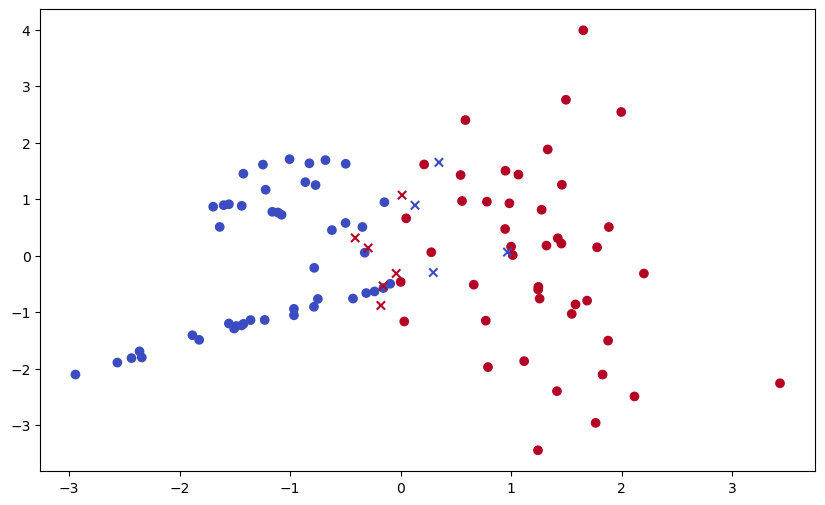

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x=Xc[:,0], y=Xc[:,1], c=y[y==pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:,0], y=Xf[:,1], c=y[y!=pred], marker='x', cmap='coolwarm');

## Decision trees
* Decision tress classifiers can be thought of as a stepwise partitioning of the data space. 

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(max_depth=1)

In [33]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [34]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [35]:
pred = model.predict(X)

In [36]:
accuracy_score(y, pred)

0.92

In [37]:
Xc = X[y==pred]
Xf = X[y!=pred]

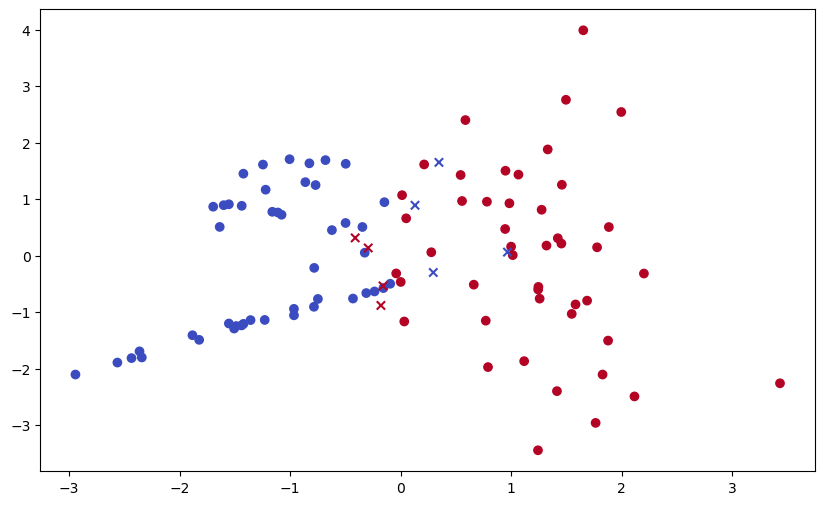

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x=Xc[:,0], y=Xc[:,1], c=y[y==pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:,0], y=Xf[:,1], c=y[y!=pred], marker='x', cmap='coolwarm');

* Increasing the maximum depth parameter for the decision tree allows to obtain a perfect result. 
* But note that overfitting may occur.

In [39]:
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1,7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X,y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth,acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


## Deep neural networks (DNN's)

### Deep neural networks
* DNN's are very powerful and versatile algorithms for estimation and for classification.
* They are particularly useful for learning non-linear relationships, but this also makes them computationally demanding.
* *Deep* refers to so-called hidden layers in the network, which makes them powerful, but can also make it hard to understand how a DNN operates ("black box").
* `TensorFlow` is a popular open-source platform for DNN's. 

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
model = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [75],  random_state=10)
%time model.fit(X,y)

CPU times: user 3.09 s, sys: 252 ms, total: 3.34 s
Wall time: 374 ms


/Users/nat/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[75, 75], random_state=10,
              solver='lbfgs')

In [42]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [43]:
accuracy_score (y, pred)

1.0

## Support vector machines (SVM's)
* Aside from introducing SVM's we investigate how to split a data set into separate training and testing data sets.
* A SVM is a classifier that linearly splits a hyperplane. 

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [45]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

In [46]:
model = SVC(C=1, kernel='linear')
model.fit(train_x, train_y) # fit the model using the training data

SVC(C=1, kernel='linear')

In [47]:
pred_train = model.predict(train_x) # predict the training data label values

In [48]:
accuracy_score(train_y, pred_train) # "in-sample" prediction rate

0.9402985074626866

In [49]:
pred_test = model.predict(test_x)

In [50]:
test_y == pred_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [51]:
accuracy_score(test_y, pred_test) # "out-of-sample" prediction rate

0.7878787878787878

In [52]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

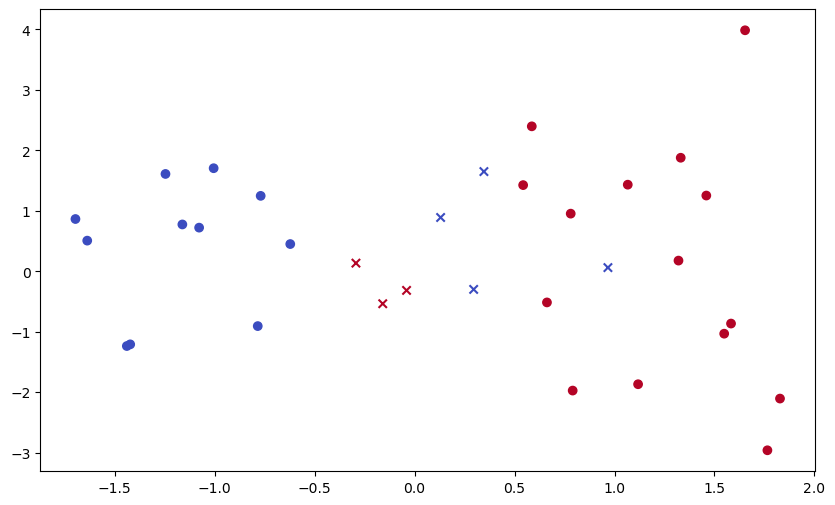

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x=test_c[:,0], y=test_c[:,1], c=test_y[test_y == pred_test], marker='o', cmap='coolwarm')
plt.scatter(x=test_f[:,0], y=test_f[:,1], c=test_y[test_y != pred_test], marker='x', cmap='coolwarm');